In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as f
import torch.nn.functional as F



# Experiment 3

In [3]:
train_csv2  = pd.read_csv('/content/drive/MyDrive/Soft computing/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/drive/MyDrive/Soft computing/Dataset_2/verification_train.csv')

In [4]:
import numpy as np
class second_Dataset(Dataset):
    
    def __init__(self, data, transform = None):
        self.data = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [5]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [6]:
# Hyperparameters

batch_size = 25
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [8]:
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)  
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

In [10]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(input_dim, num_hidden)  #flatten the image 
        self.fc2=nn.Linear(num_hidden,num_hidden)
        self.fc3=nn.Linear(num_hidden,num_hidden)
        self.fc4=nn.Linear(num_hidden,num_hidden)  
        self.fc5=nn.Linear(num_hidden,num_hidden)
        self.fc6=nn.Linear(num_hidden,10)
        
    def forward(self,x): # pass the data
        
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x=f.relu(self.fc4(x))
        x=f.relu(self.fc5(x))
        
        x=self.fc6(x)
        
        return x
#     def __init__(self, input_size, num_classes, num_hidden):
#         super().__init__()
#         self.fc_1 = nn.Linear(input_size, num_hidden)
# #         self.relu_1 = nn.ReLU()

#         self.fc_2 = nn.Linear(num_hidden, num_hidden)
# #         self.relu_2 = nn.ReLU()

#         self.fc_3 = nn.Linear(num_hidden, num_hidden)
# #         self.relu_3 = nn.ReLU()

#         self.fc_4 = nn.Linear(num_hidden, num_hidden)
# #         self.relu_4 = nn.ReLU()

#         self.fc_5 = nn.Linear(num_hidden, num_hidden)
# #         self.relu_5 = nn.ReLU()

#         self.fc_6 = nn.Linear(num_hidden, num_hidden)
# #         self.relu_6 = nn.ReLU()
#         self.linear_out = nn.Linear(num_hidden, num_classes)

#     def forward(self, x):
#         x  = self.fc_1(x)
#         x = self.relu_1(x)
        
#         x  = self.fc_2(x)
#         x = self.relu_2(x)
        
#         x  = self.fc_3(x)
#         x = self.relu_3(x)
        
#         x  = self.fc_4(x)
#         x = self.relu_4(x)

#         x  = self.fc_5(x)
#         x = self.relu_5(x)
        
#         x  = self.fc_6(x)
#         x = self.relu_6(x)
     
#         probas  = self.linear_out(x)
#         return probas

In [11]:
model = DeepNeuralNetworkModel()
model.to(device)

DeepNeuralNetworkModel(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=200, bias=True)
  (fc6): Linear(in_features=200, out_features=10, bias=True)
)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 400 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 400. Loss: 0.717374861240387. Accuracy: 80.59
Iteration: 800. Loss: 0.5522693395614624. Accuracy: 79.26833333333333
Iteration: 1200. Loss: 0.7641915082931519. Accuracy: 75.455
Iteration: 1600. Loss: 0.6599567532539368. Accuracy: 83.37333333333333
Iteration: 2000. Loss: 0.2698345482349396. Accuracy: 82.23833333333333
Iteration: 2400. Loss: 0.4690972566604614. Accuracy: 85.525
Iteration: 2800. Loss: 0.5904788970947266. Accuracy: 84.44
Iteration: 3200. Loss: 0.4572066366672516. Accuracy: 85.71666666666667
Iteration: 3600. Loss: 0.514769434928894. Accuracy: 85.18333333333334
Iteration: 4000. Loss: 0.47825804352760315. Accuracy: 87.02333333333333
Iteration: 4400. Loss: 0.2655293345451355. Accuracy: 86.65333333333334
Iteration: 4800. Loss: 0.4630606174468994. Accuracy: 86.22
Iteration: 5200. Loss: 0.449105441570282. Accuracy: 87.46
Iteration: 5600. Loss: 0.3015783429145813. Accuracy: 86.71333333333334
Iteration: 6000. Loss: 0.27983179688453674. Accuracy: 87.79333333333334
Iteratio

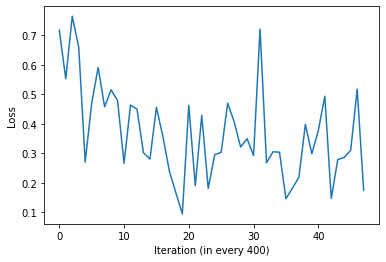

In [14]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 400)')
plt.show()

For experiment 2

In [15]:
# Hyperparameters

batch_size = 25
num_iters = 30000
input_dim = 28*28 # num_features = 784
num_hidden = 2000 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

In [16]:
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
num_epochs

12

In [17]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)   
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)  

In [18]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(input_dim, num_hidden)  #flatten the image 
        self.fc2=nn.Linear(num_hidden,num_hidden)
        self.fc3=nn.Linear(num_hidden,num_hidden)
        self.fc4=nn.Linear(num_hidden,num_hidden)  
        self.fc5=nn.Linear(num_hidden,num_hidden)
        self.fc6=nn.Linear(num_hidden,10)
        
    def forward(self,x): # pass the data
        
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x=f.relu(self.fc4(x))
        x=f.relu(self.fc5(x))
        
        x=self.fc6(x)
        
        return x

# class DeepNeuralNetworkModel(nn.Module):
#     def __init__(self, input_size, num_classes, num_hidden):
#         super().__init__()
#         self.fc_1 = nn.Linear(input_size, num_hidden)
#         self.relu_1 = nn.ReLU()

#         self.fc_2 = nn.Linear(num_hidden, num_hidden)
#         self.relu_2 = nn.ReLU()

#         self.fc_3 = nn.Linear(num_hidden, num_hidden)
#         self.relu_3 = nn.ReLU()

#         self.fc_4 = nn.Linear(num_hidden, num_hidden)
#         self.relu_4 = nn.ReLU()

#         self.fc_5 = nn.Linear(num_hidden, num_hidden)
#         self.relu_5 = nn.ReLU()

#         self.fc_6 = nn.Linear(num_hidden, num_hidden)
#         self.relu_6 = nn.ReLU()
#         self.linear_out = nn.Linear(num_hidden, num_classes)

#     def forward(self, x):
#         x  = self.fc_1(x)
#         x = self.relu_1(x)
        
#         x  = self.fc_2(x)
#         x = self.relu_2(x)
        
#         x  = self.fc_3(x)
#         x = self.relu_3(x)
        
#         x  = self.fc_4(x)
#         x = self.relu_4(x)

#         x  = self.fc_5(x)
#         x = self.relu_5(x)
        
#         x  = self.fc_6(x)
#         x = self.relu_6(x)
     
#         probas  = self.linear_out(x)
#         return probas

In [19]:
model = DeepNeuralNetworkModel()
model.to(device)

DeepNeuralNetworkModel(
  (fc1): Linear(in_features=784, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=2000, bias=True)
  (fc4): Linear(in_features=2000, out_features=2000, bias=True)
  (fc5): Linear(in_features=2000, out_features=2000, bias=True)
  (fc6): Linear(in_features=2000, out_features=10, bias=True)
)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
iteration_loss2= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 400 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss2.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 400. Loss: 0.498229056596756. Accuracy: 83.21
Iteration: 800. Loss: 0.41942253708839417. Accuracy: 83.98333333333333
Iteration: 1200. Loss: 0.3623669445514679. Accuracy: 85.99333333333334
Iteration: 1600. Loss: 0.41576361656188965. Accuracy: 85.42166666666667
Iteration: 2000. Loss: 0.22541891038417816. Accuracy: 85.63666666666667
Iteration: 2400. Loss: 0.19044357538223267. Accuracy: 86.745
Iteration: 2800. Loss: 0.3818157911300659. Accuracy: 87.67833333333333
Iteration: 3200. Loss: 0.13513578474521637. Accuracy: 88.12166666666667
Iteration: 3600. Loss: 0.1592450737953186. Accuracy: 87.25666666666666
Iteration: 4000. Loss: 0.21749842166900635. Accuracy: 87.515
Iteration: 4400. Loss: 0.5543738007545471. Accuracy: 89.26166666666667
Iteration: 4800. Loss: 0.5042711496353149. Accuracy: 89.135
Iteration: 5200. Loss: 0.34492504596710205. Accuracy: 89.705
Iteration: 5600. Loss: 0.32577037811279297. Accuracy: 87.61333333333333
Iteration: 6000. Loss: 0.331238716840744. Accuracy: 88.36

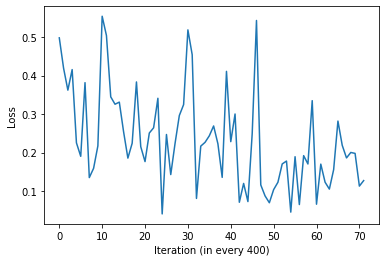

In [22]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(iteration_loss2)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 400)')
plt.show()

In [23]:
print(iteration_loss)

[0.717374861240387, 0.5522693395614624, 0.7641915082931519, 0.6599567532539368, 0.2698345482349396, 0.4690972566604614, 0.5904788970947266, 0.4572066366672516, 0.514769434928894, 0.47825804352760315, 0.2655293345451355, 0.4630606174468994, 0.449105441570282, 0.3015783429145813, 0.27983179688453674, 0.4554181694984436, 0.3561841547489166, 0.2391715794801712, 0.16598550975322723, 0.09407040476799011, 0.4623979926109314, 0.18970191478729248, 0.4282004237174988, 0.18056029081344604, 0.29485368728637695, 0.3028331696987152, 0.46962761878967285, 0.40666139125823975, 0.32085859775543213, 0.34918212890625, 0.2921390235424042, 0.7209729552268982, 0.2673744261264801, 0.30463242530822754, 0.30333030223846436, 0.14555723965168, 0.18168094754219055, 0.21783530712127686, 0.397373765707016, 0.2980499267578125, 0.3772193491458893, 0.4930651783943176, 0.1462571769952774, 0.27832093834877014, 0.2856323719024658, 0.30986693501472473, 0.517113447189331, 0.17392191290855408]


In [24]:
print(iteration_loss2)

[0.498229056596756, 0.41942253708839417, 0.3623669445514679, 0.41576361656188965, 0.22541891038417816, 0.19044357538223267, 0.3818157911300659, 0.13513578474521637, 0.1592450737953186, 0.21749842166900635, 0.5543738007545471, 0.5042711496353149, 0.34492504596710205, 0.32577037811279297, 0.331238716840744, 0.25406715273857117, 0.18575029075145721, 0.2243882715702057, 0.38367465138435364, 0.215530127286911, 0.17671306431293488, 0.2509533762931824, 0.26448529958724976, 0.34121865034103394, 0.040773916989564896, 0.24714188277721405, 0.14300374686717987, 0.22362349927425385, 0.2964121699333191, 0.3247984051704407, 0.5189319849014282, 0.45452743768692017, 0.08101360499858856, 0.21688678860664368, 0.22672496736049652, 0.24380290508270264, 0.26928362250328064, 0.22297416627407074, 0.13573820888996124, 0.41113513708114624, 0.22855490446090698, 0.30036661028862, 0.07105422765016556, 0.11995551735162735, 0.07285570353269577, 0.24939978122711182, 0.5433926582336426, 0.116108238697052, 0.0875643566

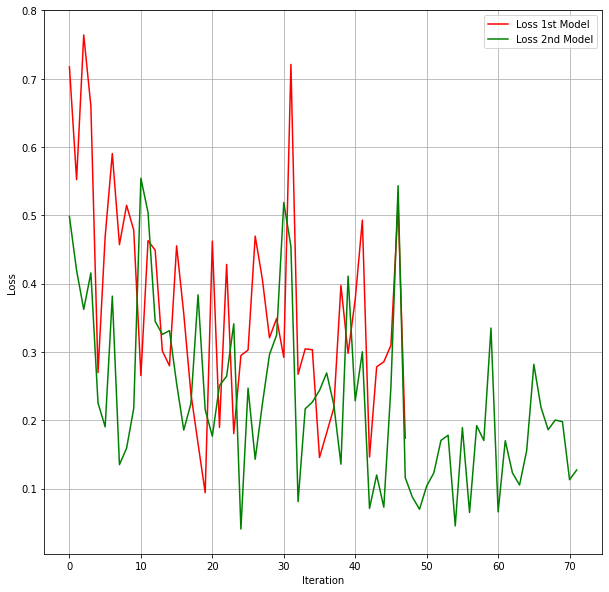

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(iteration_loss, label='Loss 1st Model',color='r')
plt.plot(iteration_loss2, label='Loss 2nd Model',color='g')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.grid()
plt.show()